# Part II - Factors That Influence Loan Defaults
## by (Awurigwe Joseph)

## Investigation Overview


In my inquiry, I sought to look at the characteristics of loans that could be used to predict their Completion or Default


## Dataset Overview

The dataset comprised of 81 features and attributes of 113,937 loans. The features included in my analysis were Term, LoanStatus, BorrowerRate, BorrowerAPR, ProsperRating (numeric), ProsperScore, ListingCategory (numeric), Occupation, EmploymentStatus, IsBorrowerHomeowner, DelinquenciesLast7Years, IncomeRange, LoanOriginalAmount, LoanOriginationDate, Recommendations

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

# Subset the dataframe by selecting features of interest
target_columns =  ['Term', 'LoanStatus', 'BorrowerRate', 'BorrowerAPR', 'ProsperRating (numeric)',
                  'ProsperScore', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus', 
                  'IsBorrowerHomeowner', 'DelinquenciesLast7Years', 'IncomeRange', 'LoanOriginalAmount',
                  'LoanOriginationDate', 'Recommendations']

loan = df[target_columns]

# renaming the column names
loan.rename(columns={'ProsperRating (numeric)':'ProsperRatingNumeric', 'ListingCategory (numeric)':'ListingCategoryNumeric'}, inplace=True)

# dropping rows with missing values in `ProsperRatingNumeric` and `ProsperScore`
#loan = loan.dropna(subset=['ProsperRatingNumeric', 'ListingCategoryNumeric'], inplace=True)
loan = loan.dropna(subset=['ProsperRatingNumeric', 'ListingCategoryNumeric'])

#Converting LoanOriginationDate to datetime 
loan['LoanOriginationDate'] = pd.to_datetime(loan['LoanOriginationDate'])

#Extracting Year information from that
loan['year']= loan['LoanOriginationDate'].dt.year

# binning the values with the pandas cut()
bins = np.arange(0.04, loan.BorrowerRate.max()+0.025, 0.025)
loan['Binned_BorrowerRate'] = pd.cut(loan['BorrowerRate'], bins)

income_order = ['$0', '$1-24,999', '$25,000-49,999', 
                '$50,000-74,999','$75,000-99,999', '$100,000+']

# replacing Chargedoff to Defaulted
loan['LoanStatus'] = loan.LoanStatus.replace('Chargedoff','Defaulted')

def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)]

loan = filter_rows_by_values(loan, 'LoanStatus', ['Completed', 'Defaulted'])

# creating categorical data type
IncomeRange_list = list(loan.IncomeRange.value_counts().index)

incomes = pd.api.types.CategoricalDtype(ordered=True, categories= IncomeRange_list)

loan['IncomeRange'] = loan['IncomeRange'].astype(incomes)

# creating categorical data type
LoanStatus_list = list(loan.LoanStatus.value_counts().index)

incomes = pd.api.types.CategoricalDtype(ordered=True, categories= LoanStatus_list)

loan['LoanStatus'] = loan['LoanStatus'].astype(incomes)

# setting base color
base_color = sb.color_palette()[0]
# setting theme
sb.set_style("darkgrid")

loan.shape

(26005, 17)

### Prosper Rating (Numeric)

The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

The distribution of the Prosper Rating follows a normal distribution and is Unimodal
The `4` rating is the most common rating given to customers with the `1` and `7` the least.

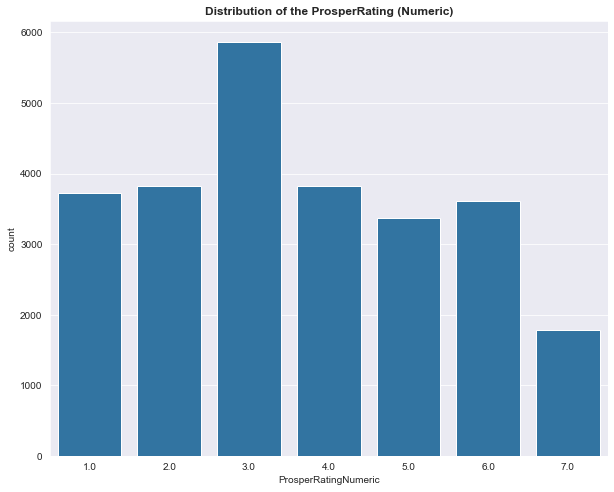

In [3]:
# countplot
plt.figure(figsize=[10,8])
sb.countplot(data= loan, x= "ProsperRatingNumeric", color=base_color);
plt.title("Distribution of the ProsperRating (Numeric)", fontweight='bold');

### Interest Rate

The Borrower's interest rate for this loan. 

From the histogram, we can clearly see the distribution the borrower rate, It has a multimodal distribution.
The variable peaked at the 3.15-3.20 bin. Which means that the majority of the borrower rates are in that region

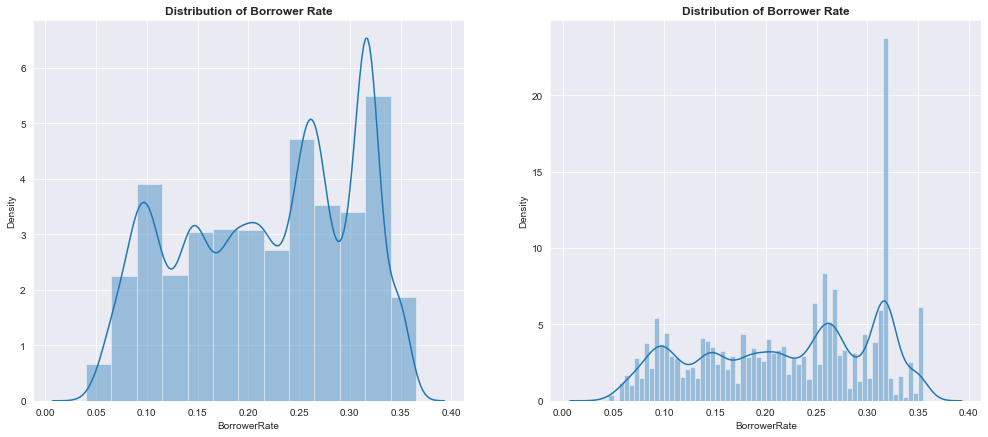

In [4]:
plt.figure(figsize=[17,7])

plt.subplot(1,2,1)
bins = np.arange(0.04, loan.BorrowerRate.max()+0.025, 0.025)
sb.distplot(loan.BorrowerRate, bins=bins);
plt.title("Distribution of Borrower Rate", fontweight= 'bold');

plt.subplot(1,2,2)
bins = np.arange(0.04, loan.BorrowerRate.max()+0.005, 0.005)
sb.distplot(loan.BorrowerRate, bins=bins);
plt.title("Distribution of Borrower Rate", fontweight= 'bold');

### Loan Status Vs Loan Amount

One of my leading hypothesis was that that the amount of a loan should correlate to the status of the loan

Unfortunately, there was not much correlation between the Loan Amount and the Loan Status

We saw that they were similar with the defaulted having more at the 4000-5000 range

The Loan Amounts that were above 26000 were Completed

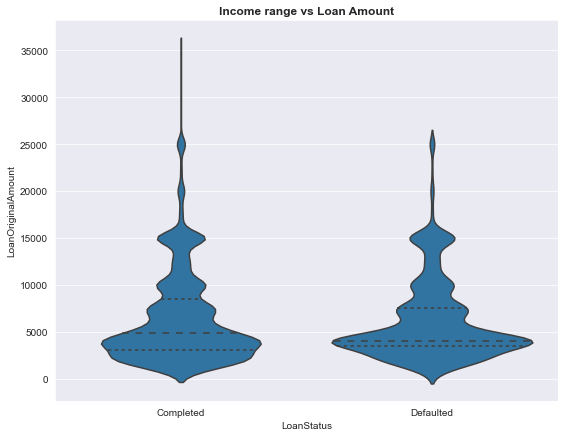

In [5]:
# violin plot

plt.figure(figsize=[9,7])
sb.violinplot(data=loan, x='LoanStatus', y= 'LoanOriginalAmount', inner='quartile', color=base_color,);
plt.title("Income range vs Loan Amount", fontweight= 'bold');

### Loan Status vs Prosper Rating

I always felt that this would be the most decisive factor on the Loan Status

1. The '7' rating has the lowest percentage and counts of defaulters, which means that the ratings work
2. The '3' ratinh has the highest count of defaulters, and also the highest count of completed, which means that the percentage of defaulters would still be less
3. From rating '3' we saw the number of defaulters fall down to rating 7 which is the lowest

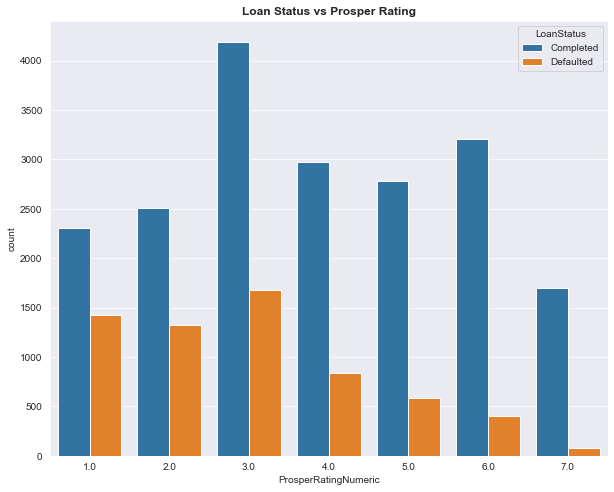

In [6]:
plt.figure(figsize= [10,8])

sb.countplot(data= loan, x= "ProsperRatingNumeric", hue= "LoanStatus");
plt.title("Loan Status vs Prosper Rating", fontweight= 'bold');

### Borrower Rate by Prosper rating and Loan Status

- There's a strong correlation between the borrowerRate and the Ratings
- People with Higher ratings get lesser BorrowerRate and otherwise
- in every instance, the BorrowerRate of the defaulters were always greater than that of those that completed their loan

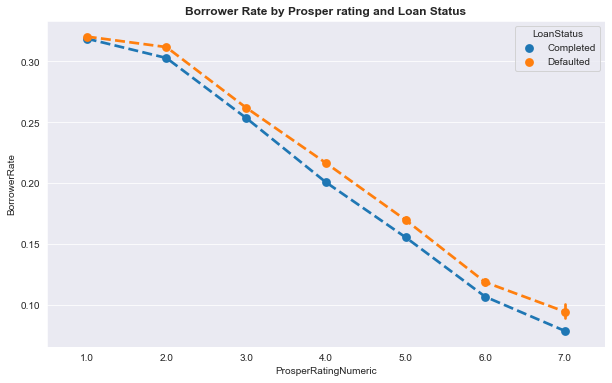

In [7]:
#plot pointplot 
fig = plt.figure(figsize = [10,6])
sb.pointplot(data = loan, x = 'ProsperRatingNumeric', y = 'BorrowerRate', hue = 'LoanStatus',
                  linestyles = 'dashed')
plt.title("Borrower Rate by Prosper rating and Loan Status", fontweight= 'bold');

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt